In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as sts
import requests
import time
from scipy.stats import linregress
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd



In [2]:
# File to Load (Remember to Change These)
Kansas_race_file = "kansas-race-ethnicity-historical.csv"
Kansas_race_cases = pd.read_csv(Kansas_race_file)
# Read Purchasing File and store into Pandas data frame
df= pd.read_csv(Kansas_race_file)

In [4]:
df.head()

,State,Date,Cases_Asian,Cases_AIAN,Cases_Black,Cases_White,Cases_Other,Cases_NonHispanic,Cases_Hispanic,Cases_Unknown,Cases_Total,Deaths_AIAN,Deaths_Asian,Deaths_Black,Deaths_Hispanic,Deaths_NonHispanic,Deaths_Unknown,Deaths_Other,Deaths_White,Deaths_Total
0,KS,20210303,5492,2069,14291,209133,12144,181823,39072,74214,295109,37,63.0,236,308,3799,709,243,3724,4816
1,KS,20210228,5435,2059,14199,207907,12047,180592,38929,74142,293663,37,61.0,230,306,3737,692,239,3665,4735
2,KS,20210224,5412,2051,14150,207207,11983,179866,38820,74151,292837,37,60.0,230,304,3729,691,239,3656,4724
3,KS,20210221,5344,2037,14056,205615,11849,178256,38566,74010,290832,36,58.0,227,297,3643,674,234,3568,4614
4,KS,20210217,5281,2022,13968,203804,11735,176564,38359,73794,288717,36,57.0,222,290,3576,655,228,3500,4521


In [5]:
#create variable for first row which contains totals 
total_numbers = df.loc[0]
total_numbers

State                       KS
Date                  20210303
Cases_Asian               5492
Cases_AIAN                2069
Cases_Black              14291
Cases_White             209133
Cases_Other              12144
Cases_NonHispanic       181823
Cases_Hispanic           39072
Cases_Unknown            74214
Cases_Total             295109
Deaths_AIAN                 37
Deaths_Asian                63
Deaths_Black               236
Deaths_Hispanic            308
Deaths_NonHispanic        3799
Deaths_Unknown             709
Deaths_Other               243
Deaths_White              3724
Deaths_Total              4816
Name: 0, dtype: object

In [6]:
df.nunique()

State                  1
Date                  92
Cases_Asian           91
Cases_AIAN            89
Cases_Black           91
Cases_White           91
Cases_Other           91
Cases_NonHispanic     91
Cases_Hispanic        91
Cases_Unknown         91
Cases_Total           91
Deaths_AIAN           29
Deaths_Asian          40
Deaths_Black          68
Deaths_Hispanic       78
Deaths_NonHispanic    90
Deaths_Unknown        68
Deaths_Other          58
Deaths_White          89
Deaths_Total          90
dtype: int64

In [7]:
county_ET_df=df.dropna(how="any")
county_ET_df.head(2)

,State,Date,Cases_Asian,Cases_AIAN,Cases_Black,Cases_White,Cases_Other,Cases_NonHispanic,Cases_Hispanic,Cases_Unknown,Cases_Total,Deaths_AIAN,Deaths_Asian,Deaths_Black,Deaths_Hispanic,Deaths_NonHispanic,Deaths_Unknown,Deaths_Other,Deaths_White,Deaths_Total
0,KS,20210303,5492,2069,14291,209133,12144,181823,39072,74214,295109,37,63.0,236,308,3799,709,243,3724,4816
1,KS,20210228,5435,2059,14199,207907,12047,180592,38929,74142,293663,37,61.0,230,306,3737,692,239,3665,4735


In [8]:
county_ET_df.nunique()

State                  1
Date                  91
Cases_Asian           90
Cases_AIAN            89
Cases_Black           90
Cases_White           90
Cases_Other           90
Cases_NonHispanic     90
Cases_Hispanic        90
Cases_Unknown         90
Cases_Total           90
Deaths_AIAN           29
Deaths_Asian          40
Deaths_Black          67
Deaths_Hispanic       78
Deaths_NonHispanic    89
Deaths_Unknown        68
Deaths_Other          58
Deaths_White          88
Deaths_Total          89
dtype: int64

In [9]:
county_ET_df.value_counts()
pd.set_option('display.max_rows', None)
county_ET_df

,State,Date,Cases_Asian,Cases_AIAN,Cases_Black,Cases_White,Cases_Other,Cases_NonHispanic,Cases_Hispanic,Cases_Unknown,Cases_Total,Deaths_AIAN,Deaths_Asian,Deaths_Black,Deaths_Hispanic,Deaths_NonHispanic,Deaths_Unknown,Deaths_Other,Deaths_White,Deaths_Total
0,KS,20210303,5492,2069,14291,209133,12144,181823,39072,74214,295109,37,63.0,236,308,3799,709,243,3724,4816
1,KS,20210228,5435,2059,14199,207907,12047,180592,38929,74142,293663,37,61.0,230,306,3737,692,239,3665,4735
2,KS,20210224,5412,2051,14150,207207,11983,179866,38820,74151,292837,37,60.0,230,304,3729,691,239,3656,4724
3,KS,20210221,5344,2037,14056,205615,11849,178256,38566,74010,290832,36,58.0,227,297,3643,674,234,3568,4614
4,KS,20210217,5281,2022,13968,203804,11735,176564,38359,73794,288717,36,57.0,222,290,3576,655,228,3500,4521
5,KS,20210214,5221,1999,13826,201605,11583,174410,38059,73633,286102,35,57.0,214,283,3450,631,224,3371,4364
6,KS,20210210,5197,1986,13777,200542,11503,173464,37932,73498,284894,34,54.0,212,281,3408,614,222,3325,4303
7,KS,20210207,5123,1964,13617,197834,11322,170887,37589,73086,281562,32,51.0,204,273,3244,584,213,3172,4101
8,KS,20210203,5064,1950,13488,195609,11213,169027,37306,72582,278915,31,48.0,195,261,3079,555,204,3005,3895
9,KS,20210131,4980,1909,13321,192322,10997,165917,36842,71926,274685,29,45.0,192,260,2987,532,205,2912,3779


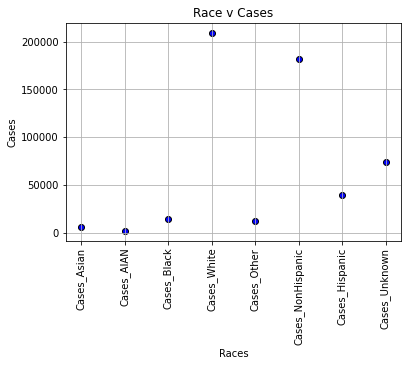

In [18]:
#Scatter plot race vs cases
Age = ["Cases_Asian","Cases_AIAN","Cases_Black","Cases_White","Cases_Other","Cases_NonHispanic","Cases_Hispanic","Cases_Unknown"]
Cases = [5492, 2069, 14291, 209133,  12144, 181823, 39072, 74214,]
plt.title("Race v Cases")
plt.xlabel("Races")
plt.ylabel("Cases")
plt.xticks(rotation="vertical")
plt.grid()
plt.scatter(Age, Cases, marker="o", facecolors="blue", edgecolors="black")

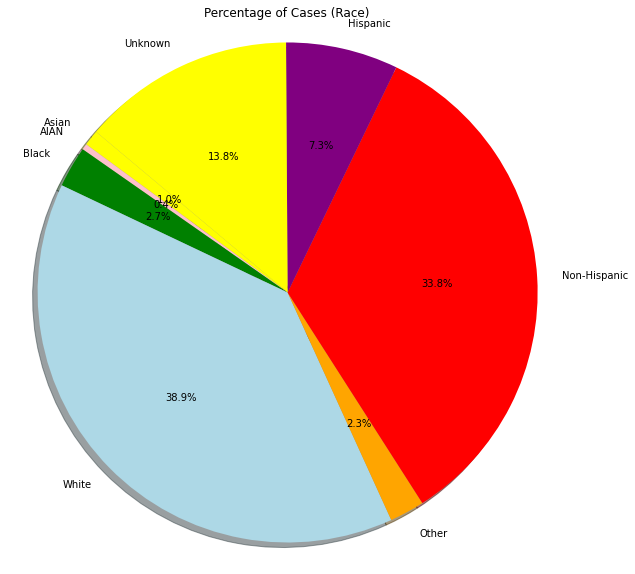

In [17]:
#Pie chart number of cases (race)
Race = ["Cases_Asian","Cases_AIAN","Cases_Black","Cases_White","Cases_Other","Cases_NonHispanic","Cases_Hispanic","Cases_Unknown"]
Race_case_count = [5492, 2069, 14291, 209133,  12144, 181823, 39072, 74214,]
colors = ["yellow", "pink", "green","lightblue","orange","red","purple"]
labels = ("Asian", "AIAN", "Black", "White", "Other", "Non-Hispanic", "Hispanic", "Unknown")
plt.figure(figsize=(10,10))
plt.pie(Race_case_count, labels = labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of Cases (Race)")
plt.axis("equal")
plt.show()

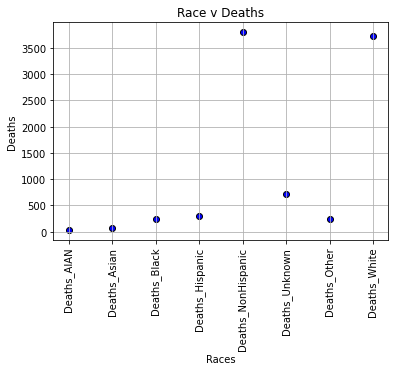

In [19]:
#Scatter plot race vs deaths
Age = ["Deaths_AIAN", "Deaths_Asian", "Deaths_Black", "Deaths_Hispanic", "Deaths_NonHispanic", "Deaths_Unknown", "Deaths_Other", "Deaths_White"]
Cases = [37, 63, 236, 308,  3799, 709, 243, 3724,]
plt.title("Race v Deaths")
plt.xlabel("Races")
plt.ylabel("Deaths")
plt.xticks(rotation="vertical")
plt.grid()
plt.scatter(Age, Cases, marker="o", facecolors="blue", edgecolors="black")

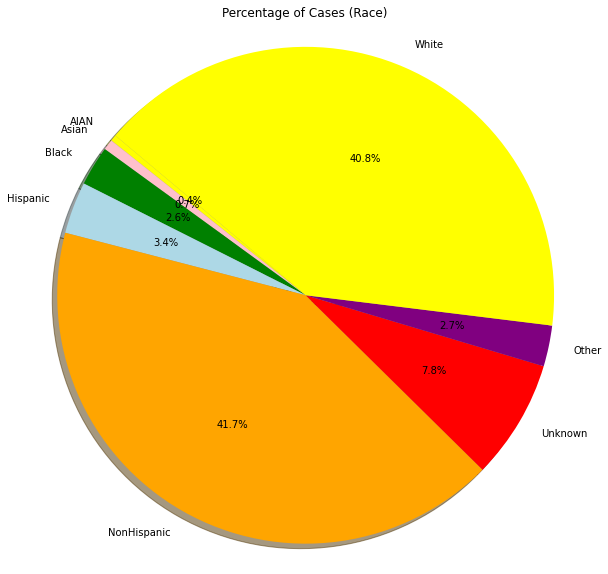

In [20]:
#Pie chart percentage of deaths (race)
Race = ["Deaths_AIAN", "Deaths_Asian", "Deaths_Black", "Deaths_Hispanic", "Deaths_NonHispanic", "Deaths_Unknown", "Deaths_Other", "Deaths_White"]
Race_case_count = [37, 63, 236, 308,  3799, 709, 243, 3724,]
colors = ["yellow", "pink", "green","lightblue","orange","red","purple"]
labels = ("AIAN", "Asian", "Black", "Hispanic", "NonHispanic", "Unknown", "Other", "White")
plt.figure(figsize=(10,10))
plt.pie(Race_case_count, labels = labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of Cases (Race)")
plt.axis("equal")
plt.show()